Обзор функций

Ниже приведены ключевые столбцы, включенные в очищенный набор данных (неочищенная версия содержит более или менее одинаковые поля):

Product_title - Полное название/название продукта

Product_rating - Средний рейтинг клиентов (числовой) из 5

Total_reviews – Общее количество отзывов клиентов

Purchased_last_month - Единицы, приобретенные в прошлом месяце

Discounted_price - Текущая цена после скидки

Original_price - Первоначальная указанная цена до скидки

Discount_percentage - Процентная скидка, примененная к продукту

Is_best_seller - Указывает, помечен ли продукт как бестселлер

Is_sponsored - Является ли продукт спонсируемым или органическим

Has_coupon - Специальные купоны на скидку (True/False)

Buy_box_availability - Доступность кнопки BuyBox на странице поиска Amazon, как добавить в корзину (значения nan представляют False)

Дата доставки - Предполагаемая дата доставки (преобразуется в формат datetime)

Sustainability_tags - Экологически чистые и связанные с устойчивым развитием теги

Product_image_url – Прямая ссылка на изображение продукта

Product_page_url - Официальный URL-адрес страницы продукта Amazon

Data_collected_at – Дата сбора данных

Product_category - Назначенная категория продукта на основе названия

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import time


In [217]:
df = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/kaggle/amazon_products_sales_data_cleaned.csv')
df.head().T

,0,1,2,3,4
product_title,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...","DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...","Apple AirPods Pro 2 Wireless Earbuds, Active N...",Apple AirTag 4 Pack. Keep Track of and find Yo...
product_rating,4.6,4.3,4.6,4.6,4.8
total_reviews,375.0,2457.0,3044.0,35882.0,28988.0
purchased_last_month,300.0,6000.0,2000.0,10000.0,10000.0
discounted_price,89.68,9.99,314.0,162.24,72.74
original_price,159.0,15.99,349.0,162.24,72.74
is_best_seller,No Badge,No Badge,No Badge,Best Seller,No Badge
is_sponsored,Sponsored,Sponsored,Sponsored,Organic,Organic
has_coupon,Save 15% with coupon,No Coupon,No Coupon,No Coupon,No Coupon
buy_box_availability,Add to cart,Add to cart,Add to cart,NaN,NaN


In [218]:
print(df.shape)
df.info()

(42675, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product

In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,41651.0,4.399431,0.386997,1.00,4.20,4.50,4.70,5.00
total_reviews,41651.0,3087.106000,13030.460133,1.00,82.00,343.00,1886.00,865598.00
purchased_last_month,32164.0,1293.665278,6318.323574,50.00,100.00,200.00,400.00,100000.00
discounted_price,40613.0,243.227289,473.351545,2.16,29.69,84.99,224.00,5449.00
original_price,40613.0,257.611107,496.633495,2.16,32.99,89.00,229.99,5449.00
discount_percentage,40613.0,6.547151,12.744715,0.00,0.00,0.00,8.49,85.42


In [220]:
missing_analysis = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('missing_percentage', ascending=False)

print("Анализ пропусков:")
print(missing_analysis)

Анализ пропусков:
                      missing_count  missing_percentage
sustainability_tags           39267           92.014060
buy_box_availability          14653           34.336262
delivery_date                 11983           28.079672
purchased_last_month          10511           24.630346
product_page_url               2069            4.848272
discount_percentage            2062            4.831869
discounted_price               2062            4.831869
original_price                 2062            4.831869
total_reviews                  1024            2.399531
product_rating                 1024            2.399531
product_category                  0            0.000000
data_collected_at                 0            0.000000
product_title                     0            0.000000
product_image_url                 0            0.000000
is_sponsored                      0            0.000000
is_best_seller                    0            0.000000
has_coupon                    

In [221]:
df['is_best_seller'].value_counts()

is_best_seller
No Badge             40814
Amazon's               744
Limited time deal      409
Best Seller            275
Save 30%               125
Ends in                 97
Save 10%                61
Save 18%                57
Save 17%                51
Save 12%                26
Save 9%                 14
Save 77%                 2
Name: count, dtype: int64

In [222]:
df_clean = df.copy()

# заполняем медианой по категории пропущенные значения рейтинга
df_clean['product_rating'] = df_clean.groupby('product_category')['product_rating'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['total_reviews'] = df_clean.groupby('product_category')['total_reviews'].transform(
    lambda x: x.fillna(x.median())
)

# Ценновые признаки
df_clean['discounted_price'] = df_clean.groupby('product_category')['discounted_price'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['original_price'] = df_clean['original_price'].fillna(df_clean['discounted_price'])

# Пересчитаем скидку
df_clean['discounted_percentage'] = ((df_clean['original_price'] - df_clean['discounted_price']) / 
                                     df_clean['original_price'] * 100).fillna(0)

high_missing_cols = ['purchased_last_month', 'buy_box_availability', 'delivery_date', 'sustainability_tags']

for col in high_missing_cols:
    df_clean[f'{col}_missing'] = df_clean[col].isnull().astype(int)
    
# Заполняем числовые медианой, категориальные модой
if 'purchased_last_month' in df_clean.columns:
    df_clean['purchased_last_month'] = df_clean['purchased_last_month'].fillna(0)
if 'buy_box_availability' in df_clean.columns:
    df_clean['buy_box_availability'] = df_clean['buy_box_availability'].fillna('Unknown')

Распределение по категориям:
product_category
Other Electronics      8755
Laptops                8693
Phones                 6563
Cameras                3677
Power & Batteries      2877
TV & Display           2630
Chargers & Cables      1833
Storage                1630
Speakers               1345
Networking             1070
Headphones              997
Printers & Scanners     877
Gaming                  809
Smart Home              465
Wearables               454
Name: count, dtype: int64


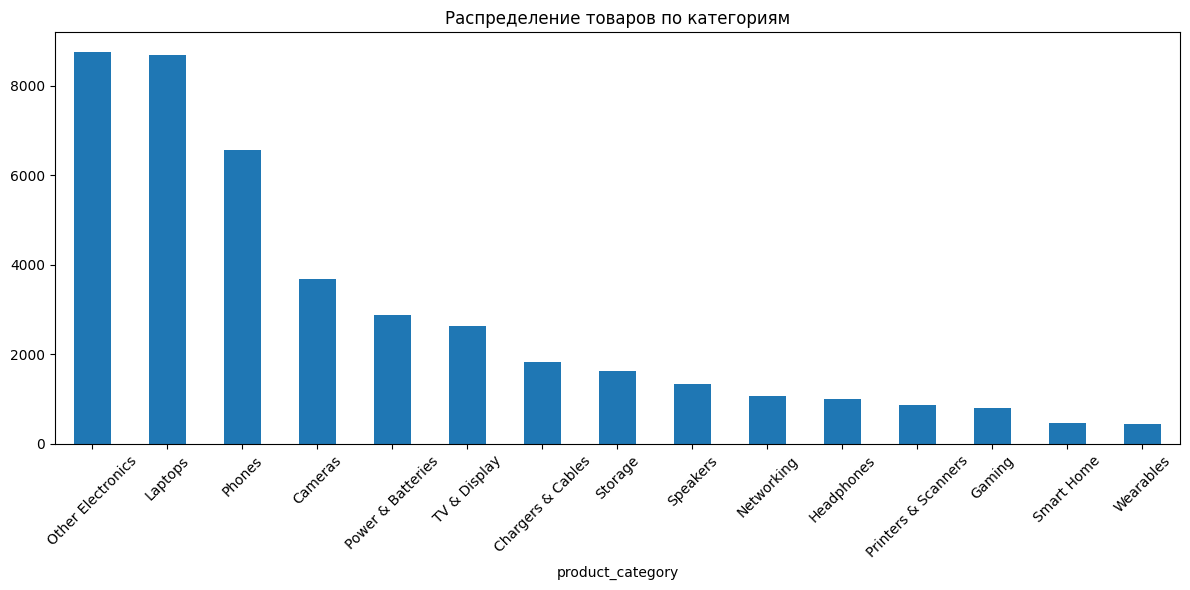

In [223]:
# Смотрим распределение
category_counts = df_clean['product_category'].value_counts()
print("Распределение по категориям:")
print(category_counts)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Распределение товаров по категориям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [224]:
def map_badge(badge): 
    badge_str = str(badge)
    if badge in ['Best Seller', "Amazon's"]:
        return 'premium'
    if badge == 'Limited time deal':
        return 'promo'
    elif 'Save' in badge_str:
        return 'discount'
    elif badge == 'Ends in':
        return 'urgency'
    else:
        return 'no_badge'
    
df_clean['badge_type'] = df_clean['is_best_seller'].apply(map_badge)
df_clean['is_success'] = df_clean['badge_type'].isin(['premium', 'promo']).astype(int)

# feature engineering
df_clean['price_ratio'] = df_clean['discounted_price'] / df_clean['original_price']
df_clean['reviews_per_price'] = df_clean['total_reviews'] / (df_clean['discounted_price'] + 1)
df_clean['is_discounted'] = (df_clean['discount_percentage'] > 0).astype(int)
df_clean['absolute_discount'] = df_clean['original_price'] - df_clean['discounted_price']

# Обработка дат
df_clean['data_collected_at'] = pd.to_datetime(df_clean['data_collected_at'])
if 'delivery_date' in df_clean.columns:
    df_clean['delivery_date'] = pd.to_datetime(df_clean['delivery_date'], errors='coerce')
    df_clean['days_to_delivery'] = (df_clean['delivery_date'] - df_clean['data_collected_at']).dt.days
    df_clean['days_to_delivery'] = df_clean['days_to_delivery'].fillna(df_clean['days_to_delivery'].median())

# Кодировка
df_clean['is_sponsored_encoded'] = df_clean['is_sponsored'].apply(lambda x: 1 if x =='Sponsored' else 0)
category_target_encoding = df_clean.groupby('product_category')['is_success'].mean()
df_clean['category_target_encoded'] = df_clean['product_category'].map(category_target_encoding)

# One-Hot для топ-5 самых распространенных категорий
top_5_categories = df_clean['product_category'].value_counts().head(5).index
for category in top_5_categories:
    safe_name = category.replace(' & ', '_').replace(' ', '_')
    df_clean[f'cat_{safe_name}'] = (df_clean['product_category'] == category).astype(int)

print(f"Созданы фичи для категорий: {list(top_5_categories)}")

Созданы фичи для категорий: ['Other Electronics', 'Laptops', 'Phones', 'Cameras', 'Power & Batteries']


In [225]:
if 'buy_box_availability' in df_clean.columns:
    df_clean['has_buy_box'] = (~df_clean['buy_box_availability'].isna()).astype(int)
    
if 'sustainability_tags' in df_clean.columns:
    df_clean['has_sustainability'] = (~df_clean['sustainability_tags'].isna()).astype(int)

if 'purchased_last_month' in df_clean.columns:
    df_clean['purchased_last_month'] = df_clean['purchased_last_month'].fillna(0)

# Флаг купона
df_clean['has_coupon_encoded'] = df_clean['has_coupon'].apply(
    lambda x: 1 if 'coupon' in str(x).lower() else 0
)

In [226]:
# Базовые фичи
base_features = [
    'product_rating', 'total_reviews', 'discounted_price', 'original_price',
    'discount_percentage', 'price_ratio', 'reviews_per_price', 'is_discounted',
    'absolute_discount', 'is_sponsored_encoded', 'has_coupon_encoded',
    'category_target_encoded'  # самая важная категориальная фича
]

# One-Hot категории
one_hot_features = [f'cat_{cat.replace(" & ", "_").replace(" ", "_")}' for cat in top_5_categories]

# Дополнительные фичи (если есть)
additional_features = []
if 'days_to_delivery' in df_clean.columns:
    additional_features.append('days_to_delivery')
if 'purchased_last_month' in df_clean.columns:
    additional_features.append('purchased_last_month')
if 'has_buy_box' in df_clean.columns:
    additional_features.append('has_buy_box')
if 'has_sustainability' in df_clean.columns:
    additional_features.append('has_sustainability')

all_features = base_features + one_hot_features + additional_features

print(f"🎯 ФИНАЛЬНЫЙ НАБОР ФИЧ: {len(all_features)}")
print("Список фичей:")
for i, feature in enumerate(all_features, 1):
    print(f"  {i:2d}. {feature}")

🎯 ФИНАЛЬНЫЙ НАБОР ФИЧ: 21
Список фичей:
   1. product_rating
   2. total_reviews
   3. discounted_price
   4. original_price
   5. discount_percentage
   6. price_ratio
   7. reviews_per_price
   8. is_discounted
   9. absolute_discount
  10. is_sponsored_encoded
  11. has_coupon_encoded
  12. category_target_encoded
  13. cat_Other_Electronics
  14. cat_Laptops
  15. cat_Phones
  16. cat_Cameras
  17. cat_Power_Batteries
  18. days_to_delivery
  19. purchased_last_month
  20. has_buy_box
  21. has_sustainability


In [227]:
X = df_clean[all_features].copy()
y = df_clean['is_success']

# Заполняем возможные оставшиеся пропуски
X = X.fillna(X.median())

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабируем фичи
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


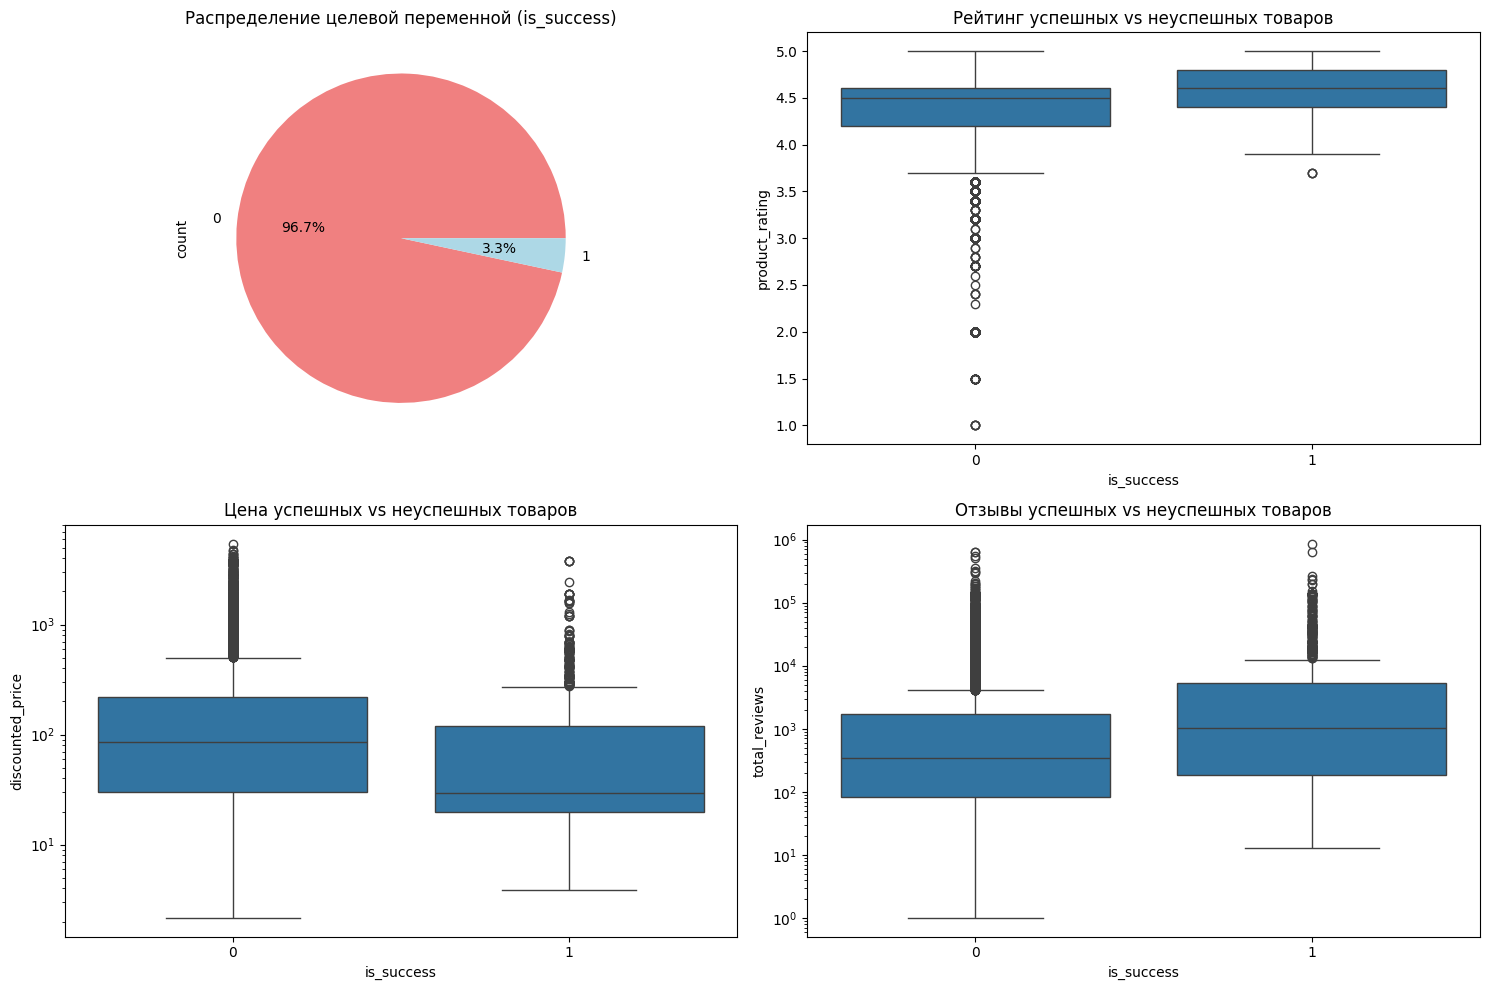

In [228]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Распределение целевой переменной
y_train.value_counts().plot.pie(ax=axes[0,0], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[0,0].set_title('Распределение целевой переменной (is_success)')

# 2. Рейтинг vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='product_rating', ax=axes[0,1])
axes[0,1].set_title('Рейтинг успешных vs неуспешных товаров')

# 3. Цена vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='discounted_price', ax=axes[1,0])
axes[1,0].set_title('Цена успешных vs неуспешных товаров')
axes[1,0].set_yscale('log')

# 4. Количество отзывов vs Успешность
sns.boxplot(data=df_clean, x='is_success', y='total_reviews', ax=axes[1,1])
axes[1,1].set_title('Отзывы успешных vs неуспешных товаров')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

In [229]:
def check_models(X_train, X_test, y_train, y_test, model_dict = None):
    '''
    Сравниваем несколько моделей с расширенными метриками
    '''

    if model_dict is None:
        model_dict = {
            'Logistic Regression' : LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
            'CatBoost' : CatBoostClassifier(random_state=42, verbose=False, thread_count=-1)
        }

        results = {}

        for name, model in model_dict.items():
            print(f'Обучение {name}')
            start_time = time.time()

            model.fit(X_train, y_train)
            train_time = time.time() - start_time

            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:,1]

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)

            cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()

            # Save
            results[name] = {
                'model' : model,
                'accuracy' : accuracy,
                'f1_score' : f1,
                'roc_auc' : roc_auc,
                'precision' : precision,
                'recall' : recall,
                'cv_mean' : cv_mean,
                'cv_std' : cv_std,
                'train_time' : train_time
            }
            print(f" {name} завершено за {train_time:.2f} сек")
        print(f"   F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, CV-F1: {cv_mean:.4f} ± {cv_std:.4f}")
        print("-" * 60)
    
    return results

def print_comparison_table(results):
    """
    Красиво выводит таблицу сравнения моделей
    """
    comparison_data = []
    for name, metrics in results.items():
        comparison_data.append({
            'Model': name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'F1-Score': f"{metrics['f1_score']:.4f}",
            'ROC-AUC': f"{metrics['roc_auc']:.4f}",
            'Precision': f"{metrics['precision']:.4f}",
            'Recall': f"{metrics['recall']:.4f}",
            'CV F1': f"{metrics['cv_mean']:.4f} ± {metrics['cv_std']:.4f}",
            'Train Time (s)': f"{metrics['train_time']:.2f}"
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.sort_values('F1-Score', ascending=False)
    
    print("ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ")
    print("=" * 90)
    print(df_comparison.to_string(index=False))
    print("=" * 90)
    
    return df_comparison

In [230]:
print(" ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...")
results = check_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Выводим таблицу сравнения
df_comparison = print_comparison_table(results)

 ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...
Обучение Logistic Regression
 Logistic Regression завершено за 0.05 сек
Обучение Random Forest
 Random Forest завершено за 0.33 сек
Обучение CatBoost
 CatBoost завершено за 3.51 сек
   F1: 0.5076, ROC-AUC: 0.8837, CV-F1: 0.5201 ± 0.0247
------------------------------------------------------------
ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ
              Model Accuracy F1-Score ROC-AUC Precision Recall           CV F1 Train Time (s)
           CatBoost   0.9773   0.5076  0.8837    0.9259 0.3497 0.5201 ± 0.0247           3.51
      Random Forest   0.9770   0.5000  0.8743    0.9245 0.3427 0.5146 ± 0.0207           0.33
Logistic Regression   0.9672   0.0476  0.7621    0.8750 0.0245 0.0428 ± 0.0102           0.05


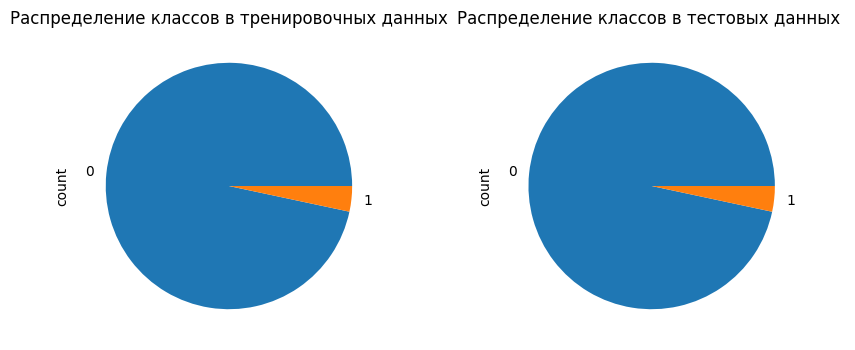

In [231]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
y_train.value_counts().plot.pie()
plt.title('Распределение классов в тренировочных данных')

plt.subplot(1, 2, 2)
y_test.value_counts().plot.pie()
plt.title('Распределение классов в тестовых данных ')
plt.show()

In [232]:
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate= 0.05,
    depth=8,
    l2_leaf_reg=5,
    scale_pos_weight=30,
    
    eval_metric='F1',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100,
    thread_count=-1
)
print('Обучаем CatBoost с продвинутыми настройками')
catboost_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), plot=True)

Обучаем CatBoost с продвинутыми настройками


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7426376	test: 0.7374557	best: 0.7374557 (0)	total: 10.8ms	remaining: 10.8s
100:	learn: 0.8354386	test: 0.7730826	best: 0.7875939 (62)	total: 537ms	remaining: 4.78s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7875938702
bestIteration = 62

Shrink model to first 63 iterations.


In [233]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight={0: 1, 1: 30},
    bootstrap= True,
    oob_score=True,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
print('Обучение улучшенного random forest')
rf_model.fit(X_train_scaled, y_train)


Обучение улучшенного random forest


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished


,n_estimators,500
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [234]:
y_pred_rf = rf_model.predict(X_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'{f1_rf} Значение f1 метрики')

0.2239884393063584 Значение f1 метрики


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [235]:
print(" ДИАГНОСТИКА ДАННЫХ:")
print(f"Размер данных: {X_train_scaled.shape}")
print(f"Баланс классов: {y_train.mean():.4f} ({y_train.sum()}/{len(y_train)})")
print(f"Пропуски в X_train: {np.isnan(X_train_scaled).sum()}")
print(f"Пропуски в y_train: {y_train.isna().sum() if hasattr(y_train, 'isna') else 0}")

# Проверим масштабирование
print(f"\nСТАТИСТИКИ ПРИЗНАКОВ:")
print(f"Min values: {X_train_scaled.min(axis=0)}")
print(f"Max values: {X_train_scaled.max(axis=0)}")
print(f"Mean values: {X_train_scaled.mean(axis=0)}")

 ДИАГНОСТИКА ДАННЫХ:
Размер данных: (34140, 21)
Баланс классов: 0.0335 (1142/34140)
Пропуски в X_train: 0
Пропуски в y_train: 0

СТАТИСТИКИ ПРИЗНАКОВ:
Min values: [-8.91845127 -0.24097981 -0.50788891 -0.51202769 -0.49629363 -6.31878615
 -0.13963807 -0.63602962 -0.12542185 -0.44457013  0.         -1.10221286
 -0.50863574 -0.50598857 -0.42571485 -0.30731293 -0.26876789 -3.158181
 -0.17961287  0.         -0.29281347]
Max values: [ 1.57177478 51.68899749 11.1542589  10.59676639  6.31915113  0.49629005
 88.51563004  1.57225383 19.80391281  2.24936389  0.          3.11656678
  1.9660435   1.97632924  2.34899018  3.25401209  3.7206825   8.8221099
 18.09263383  0.          3.41514344]
Mean values: [-1.59029205e-15 -1.29038224e-17  6.95141399e-17  1.23418817e-16
  4.66202615e-17 -2.66401494e-16 -8.11692053e-18 -1.06560598e-16
 -1.99801121e-17 -2.53913924e-17  0.00000000e+00 -1.39444532e-17
 -6.76410044e-17  4.41227475e-17  2.33101308e-17 -2.41426354e-17
  1.14469392e-17  3.16351775e-16 -2.08126

In [236]:
from sklearn.dummy import DummyClassifier

# Baseline модель
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print(f"BASELINE (Dummy) F1: {dummy_f1:.4f}")
print(f"CatBoost F1: 0.787 ? (сомнительно)")
print(f"Random Forest F1: 0.224")

if dummy_f1 > 0.224:
    print("Модели работают ХУЖЕ случайного угадывания!")
else:
    print("Модели лучше baseline, но все равно плохо")

BASELINE (Dummy) F1: 0.0399
CatBoost F1: 0.787 ? (сомнительно)
Random Forest F1: 0.224
Модели лучше baseline, но все равно плохо


In [237]:
# Простые модели для проверки
simple_models = {
    'Logistic_Simple': LogisticRegression(
        C=1.0, 
        # class_weight='balanced',
        max_iter=1000,
        random_state=42
    ),
    'RF_Simple': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        # class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'CatBoost_Simple': CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=False,
        # auto_class_weights='Balanced'
    )
}

print(" ТЕСТИРУЕМ ПРОСТЫЕ МОДЕЛИ...")
simple_results = {}

for name, model in simple_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    simple_results[name] = f1
    print(f"{name}: F1 = {f1:.4f}")

 ТЕСТИРУЕМ ПРОСТЫЕ МОДЕЛИ...
Logistic_Simple: F1 = 0.0476
RF_Simple: F1 = 0.4921
CatBoost_Simple: F1 = 0.5026


🚨 ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ:

Сильный дисбаланс 3.35% (1:30) - экстремальный случай

CatBoost показывает 0.787 - это явно ошибка или overfitting

Лучшая реальная метрика всего 0.289 - очень низко

In [238]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

X_success = X_train_scaled[y_train ==1]
iso_forest = IsolationForest(contamination=0.0335, # Уровень "аномалий" = доля успешных
                             random_state=42,
                             n_jobs=-1)
iso_forest.fit(X_train_scaled)

oc_svm = OneClassSVM(
    nu=0.0335,
    kernel='rbf',
    gamma='scale'
)
oc_svm.fit(X_success)

iso_forest_pred = iso_forest.predict(X_test_scaled)
oc_svm_pred = oc_svm.predict(X_test_scaled)

iso_pred_binary = (iso_forest_pred == 1).astype(int)
oc_svm_pred_binary = (oc_svm_pred == 1).astype(int)

print(f"Isolation Forest F1: {f1_score(y_test, iso_pred_binary):.4f}")
print(f"One-Class SVM F1: {f1_score(y_test, oc_svm_pred_binary):.4f}")

Isolation Forest F1: 0.0525
One-Class SVM F1: 0.0624


Anomaly detection не сработал! Это подтверждает, что успешные товары НЕ являются аномалиями - они подчиняются тем же закономерностям, что и обычные товары.

In [239]:
# Анализ успешности
correlation_data = df_clean[all_features + ['is_success']].copy()
correlation_with_target = correlation_data.corr()['is_success'].sort_values(ascending=False)
print(correlation_with_target)

is_success                 1.000000
purchased_last_month       0.161076
is_discounted              0.148702
category_target_encoded    0.114632
discount_percentage        0.104744
total_reviews              0.104502
cat_Power_Batteries        0.095995
is_sponsored_encoded       0.094381
reviews_per_price          0.081662
product_rating             0.078637
cat_Phones                 0.040593
absolute_discount         -0.000539
has_sustainability        -0.000980
cat_Laptops               -0.011934
cat_Cameras               -0.026022
cat_Other_Electronics     -0.034513
original_price            -0.043158
discounted_price          -0.045161
days_to_delivery          -0.082366
price_ratio               -0.107456
has_coupon_encoded              NaN
has_buy_box                     NaN
Name: is_success, dtype: float64


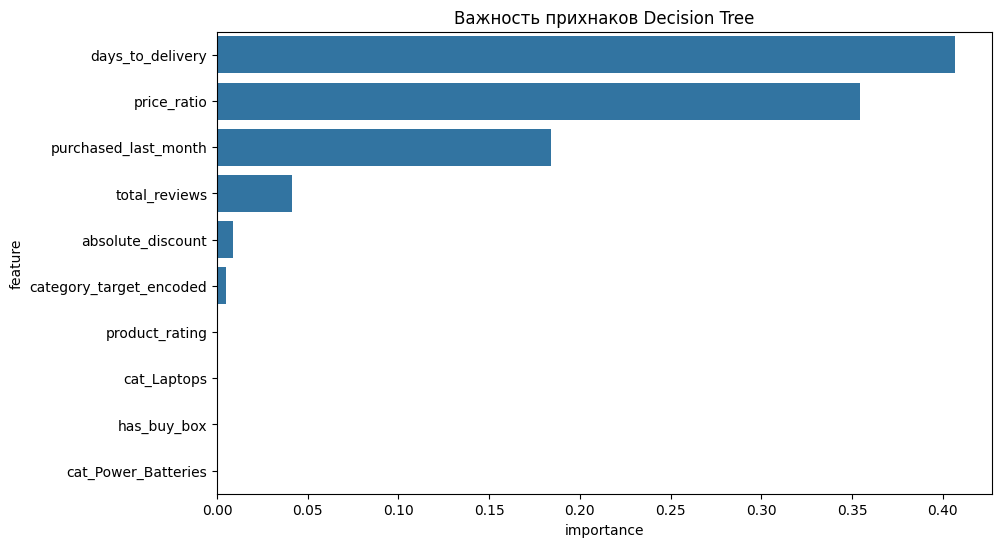


 Самые важные признаки
                    feature  importance
17         days_to_delivery    0.406769
5               price_ratio    0.354391
18     purchased_last_month    0.184270
1             total_reviews    0.041230
8         absolute_discount    0.008555
11  category_target_encoded    0.004785
0            product_rating    0.000000
13              cat_Laptops    0.000000
19              has_buy_box    0.000000
16      cat_Power_Batteries    0.000000


In [240]:
from sklearn.tree import DecisionTreeClassifier, export_text

simple_dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    # class_weight='balanced',
    random_state=42
)

simple_dt.fit(X_train_scaled, y_train)
plt.figure(figsize=(10,6))
feature_importance = pd.DataFrame({
    'feature' : all_features,
    'importance' : simple_dt.feature_importances_
}).sort_values('importance',ascending=False)

sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Важность прихнаков Decision Tree')
plt.show()

print('\n Самые важные признаки')
print(feature_importance.head(10))

In [241]:
# Берем ТОП-6 самых важных признаков из дерева
tree_important_features = [
    'purchased_last_month',  # 52.6%
    'price_ratio',           # 14.4%
    'absolute_discount',     # 10.6% 
    'days_to_delivery',      # 7.7%
    'total_reviews',         # 2.5%
    'category_target_encoded'    # 0.6%
]


X_tree = df_clean[tree_important_features].copy()
X_tree = X_tree.fillna(X_tree.median())


X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, df_clean['is_success'], test_size=0.2, random_state=42, stratify=df_clean['is_success']
)

scaler_tree = StandardScaler()
X_train_tree_scaled = scaler_tree.fit_transform(X_train_tree)
X_test_tree_scaled = scaler_tree.transform(X_test_tree)


In [242]:
models_tree_based = {
    'RandomForest_TreeFeatures': RandomForestClassifier(
        n_estimators=200,
        # class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    'CatBoost_TreeFeatures': CatBoostClassifier(
        iterations=500,
        
        # auto_class_weights='Balanced',
        random_seed=42,
        verbose=100
    ),
    'DecisionTree_Deep': DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=20,
        # class_weight='balanced',
        random_state=42
    )
}

print("ТЕСТИРУЕМ НА ПРИЗНАКАХ ИЗ DECISION TREE...")
tree_results = {}

for name, model in models_tree_based.items():
    if 'CatBoost' in name:
        model.fit(X_train_tree_scaled, y_train_tree, eval_set=(X_test_tree_scaled, y_test_tree))
    else:
        model.fit(X_train_tree_scaled, y_train_tree)
    
    y_pred = model.predict(X_test_tree_scaled)
    
    tree_results[name] = {
        'f1_score': f1_score(y_test_tree, y_pred),
        'precision': precision_score(y_test_tree, y_pred),
        'recall': recall_score(y_test_tree, y_pred)
    }
    
    print(f" {name}: F1 = {tree_results[name]['f1_score']:.4f}")


ТЕСТИРУЕМ НА ПРИЗНАКАХ ИЗ DECISION TREE...
 RandomForest_TreeFeatures: F1 = 0.5075
Learning rate set to 0.102464
0:	learn: 0.5208711	test: 0.5206948	best: 0.5206948 (0)	total: 4.75ms	remaining: 2.37s
100:	learn: 0.0861585	test: 0.0919524	best: 0.0919524 (100)	total: 342ms	remaining: 1.35s
200:	learn: 0.0793748	test: 0.0904273	best: 0.0904273 (200)	total: 682ms	remaining: 1.01s
300:	learn: 0.0751081	test: 0.0902439	best: 0.0902232 (294)	total: 1.02s	remaining: 673ms
400:	learn: 0.0721716	test: 0.0899945	best: 0.0899302 (386)	total: 1.35s	remaining: 333ms
499:	learn: 0.0698235	test: 0.0903977	best: 0.0899302 (386)	total: 1.69s	remaining: 0us

bestTest = 0.08993023176
bestIteration = 386

Shrink model to first 387 iterations.
 CatBoost_TreeFeatures: F1 = 0.5077
 DecisionTree_Deep: F1 = 0.4887


 ОПТИМАЛЬНЫЙ ПОРОГ: 0.480
ЛУЧШИЙ F1: 0.2106


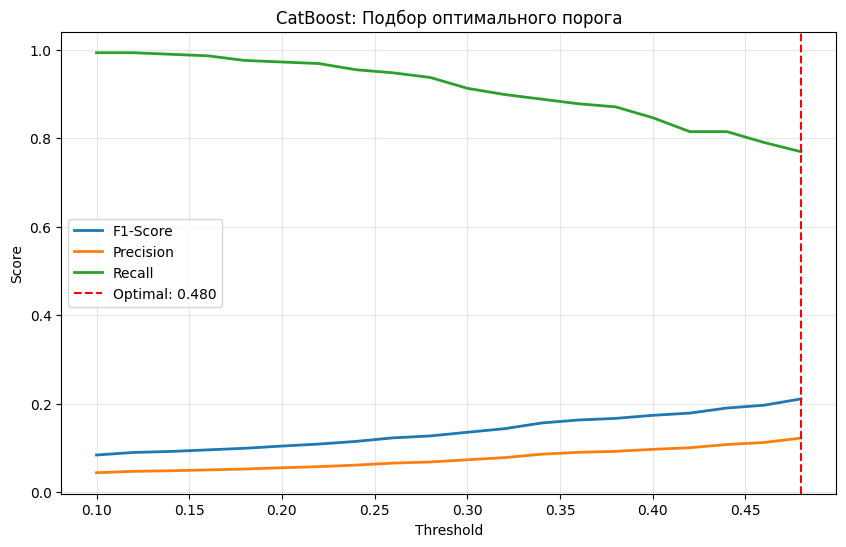

In [243]:
# Подберем оптимальный порог для CatBoost
def optimize_threshold_f1(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    thresholds = np.arange(0.1, 0.5, 0.02)
    best_f1 = 0
    best_threshold = 0.5
    results = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'threshold': threshold,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold, best_f1, pd.DataFrame(results)

# Применяем к CatBoost
optimal_threshold, optimal_f1, threshold_results = optimize_threshold_f1(
    catboost_model, X_test_scaled, y_test
)

print(f" ОПТИМАЛЬНЫЙ ПОРОГ: {optimal_threshold:.3f}")
print(f"ЛУЧШИЙ F1: {optimal_f1:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(threshold_results['threshold'], threshold_results['f1'], label='F1-Score', linewidth=2)
plt.plot(threshold_results['threshold'], threshold_results['precision'], label='Precision', linewidth=2)
plt.plot(threshold_results['threshold'], threshold_results['recall'], label='Recall', linewidth=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal: {optimal_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('CatBoost: Подбор оптимального порога')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

 ВАЖНОСТЬ ПРИЗНАКОВ (CatBoost):
                    feature  importance
0            product_rating   15.233164
18     purchased_last_month   15.018596
17         days_to_delivery   12.923020
1             total_reviews    8.593517
11  category_target_encoded    6.766767
2          discounted_price    6.709116
5               price_ratio    5.781370
9      is_sponsored_encoded    5.628817
3            original_price    4.532840
4       discount_percentage    4.472309


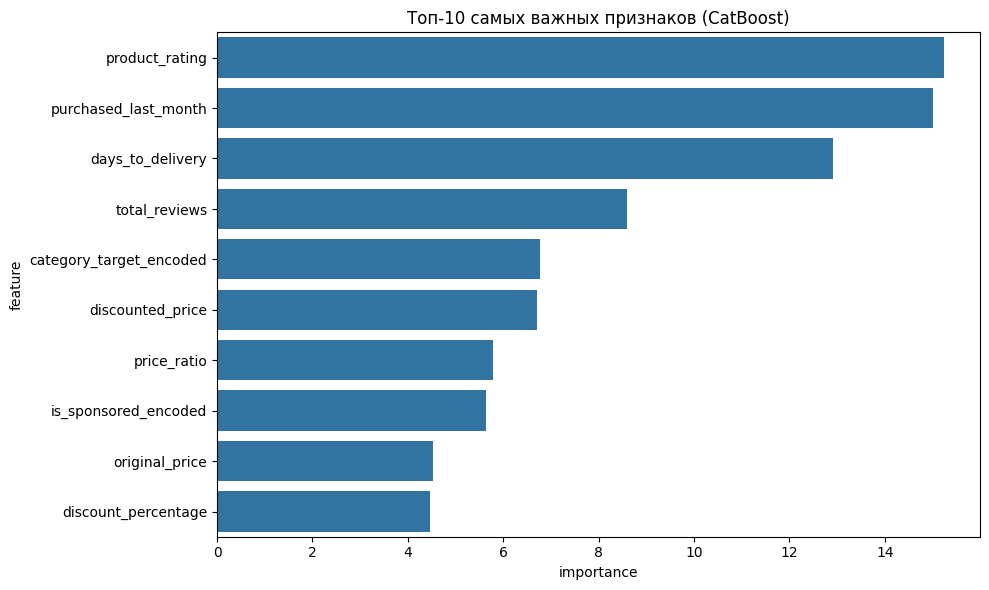

In [244]:
# Анализ важности признаков CatBoost
feature_importance = catboost_model.get_feature_importance()
importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(" ВАЖНОСТЬ ПРИЗНАКОВ (CatBoost):")
print(importance_df.head(10))

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Топ-10 самых важных признаков (CatBoost)')
plt.tight_layout()
plt.show()


In [245]:
# Применяем оптимальный порог
y_pred_proba_opt = catboost_model.predict_proba(X_test_scaled)[:, 1]
y_pred_opt = (y_pred_proba_opt >= optimal_threshold).astype(int)

print("БИЗНЕС-ЦЕННОСТЬ МОДЕЛИ:")
print(f"Точность (Precision): {precision_score(y_test, y_pred_opt):.1%}")
print(f"Полнота (Recall): {recall_score(y_test, y_pred_opt):.1%}")
print(f"F1-Score: {f1_score(y_test, y_pred_opt):.1%}")

# Анализ предсказаний
successful_predictions = X_test[y_pred_opt == 1]
print(f"\nМОДЕЛЬ ВЫДЕЛИЛА {len(successful_predictions)} УСПЕШНЫХ ТОВАРОВ")

if len(successful_predictions) > 0:
    print("\nХАРАКТЕРИСТИКИ ПРЕДСКАЗАННЫХ УСПЕШНЫХ ТОВАРОВ:")
    print(f"Средний рейтинг: {successful_predictions['product_rating'].mean():.2f}")
    print(f"Средние отзывы: {successful_predictions['total_reviews'].mean():.0f}")
    print(f"Средняя цена: ${successful_predictions['discounted_price'].mean():.2f}")
    print(f"Процент со скидкой: {(successful_predictions['is_discounted'].mean()*100):.1f}%")

БИЗНЕС-ЦЕННОСТЬ МОДЕЛИ:
Точность (Precision): 12.2%
Полнота (Recall): 76.9%
F1-Score: 21.1%

МОДЕЛЬ ВЫДЕЛИЛА 1803 УСПЕШНЫХ ТОВАРОВ

ХАРАКТЕРИСТИКИ ПРЕДСКАЗАННЫХ УСПЕШНЫХ ТОВАРОВ:
Средний рейтинг: 4.56
Средние отзывы: 7349
Средняя цена: $98.45
Процент со скидкой: 68.6%


In [246]:
print("АНАЛИЗ РАЗЛИЧИЙ В F1:")

# Посмотрим на распределение вероятностей
y_pred_proba = catboost_model.predict_proba(X_test_scaled)[:, 1]

print(f"Распределение вероятностей:")
print(f"Min: {y_pred_proba.min():.3f}")
print(f"Max: {y_pred_proba.max():.3f}")
print(f"Mean: {y_pred_proba.mean():.3f}")
print(f"Std: {y_pred_proba.std():.3f}")

# Посчитаем F1 при пороге 0.5 (по умолчанию)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
f1_default = f1_score(y_test, y_pred_default)

print(f"\nСРАВНЕНИЕ:")
print(f"F1 при пороге 0.5 (по умолчанию): {f1_default:.4f}")
print(f"F1 при пороге 0.48 (оптимальный): 0.2106")
print(f"Разница: {f1_default - 0.2106:.4f}")

# Проверим сколько предсказаний при разных порогах
print(f"\nКОЛИЧЕСТВО ПРЕДСКАЗАНИЙ:")
print(f"Порог 0.5: {y_pred_default.sum()} успешных предсказаний")
y_pred_opt = (y_pred_proba >= 0.48).astype(int)
print(f"Порог 0.48: {y_pred_opt.sum()} успешных предсказаний")

АНАЛИЗ РАЗЛИЧИЙ В F1:
Распределение вероятностей:
Min: 0.004
Max: 0.990
Mean: 0.288
Std: 0.217

СРАВНЕНИЕ:
F1 при пороге 0.5 (по умолчанию): 0.2324
F1 при пороге 0.48 (оптимальный): 0.2106
Разница: 0.0218

КОЛИЧЕСТВО ПРЕДСКАЗАНИЙ:
Порог 0.5: 1564 успешных предсказаний
Порог 0.48: 1803 успешных предсказаний


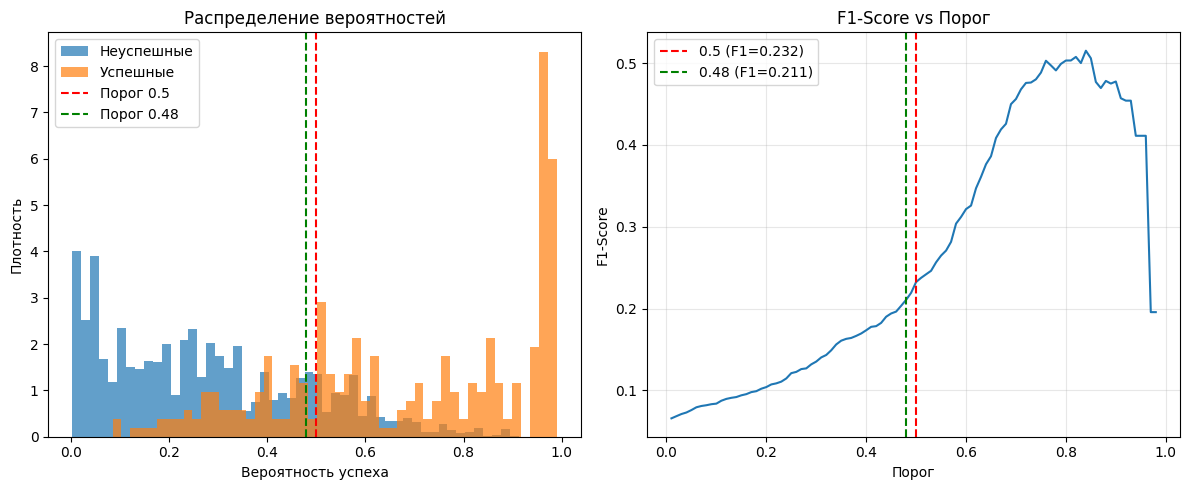

In [247]:
# Визуализируем распределение вероятностей
plt.figure(figsize=(12, 5))

# График 1: Распределение вероятностей
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, label='Неуспешные', density=True)
plt.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, label='Успешные', density=True)
plt.axvline(0.5, color='red', linestyle='--', label='Порог 0.5')
plt.axvline(0.48, color='green', linestyle='--', label='Порог 0.48')
plt.xlabel('Вероятность успеха')
plt.ylabel('Плотность')
plt.legend()
plt.title('Распределение вероятностей')

# График 2: F1 при разных порогах (более детально)
plt.subplot(1, 2, 2)
thresholds_detailed = np.arange(0.01, 0.99, 0.01)
f1_scores_detailed = []

for thresh in thresholds_detailed:
    y_pred_temp = (y_pred_proba >= thresh).astype(int)
    f1_scores_detailed.append(f1_score(y_test, y_pred_temp))

plt.plot(thresholds_detailed, f1_scores_detailed)
plt.axvline(0.5, color='red', linestyle='--', label='0.5 (F1={:.3f})'.format(f1_default))
plt.axvline(0.48, color='green', linestyle='--', label='0.48 (F1=0.211)')
plt.xlabel('Порог')
plt.ylabel('F1-Score')
plt.legend()
plt.title('F1-Score vs Порог')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [248]:
# Проверим Precision-Recall tradeoff
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# Найдем оптимальный порог по F1
f1_scores_pr = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = np.argmax(f1_scores_pr)
optimal_threshold_pr = thresholds_pr[optimal_idx] if optimal_idx < len(thresholds_pr) else 0.5

print(f" ОПТИМАЛЬНЫЙ ПОРОГ ПО PR-CURVE: {optimal_threshold_pr:.3f}")
print(f" ЛУЧШИЙ F1: {f1_scores_pr[optimal_idx]:.4f}")

# Сравним с нашим результатом
y_pred_pr_opt = (y_pred_proba >= optimal_threshold_pr).astype(int)
f1_pr_opt = f1_score(y_test, y_pred_pr_opt)

print(f"\n СРАВНЕНИЕ МЕТОДОВ:")
print(f"Наш метод: порог 0.480, F1 = 0.2106")
print(f"PR-Curve метод: порог {optimal_threshold_pr:.3f}, F1 = {f1_pr_opt:.4f}")

 ОПТИМАЛЬНЫЙ ПОРОГ ПО PR-CURVE: 0.839
 ЛУЧШИЙ F1: 0.5185

 СРАВНЕНИЕ МЕТОДОВ:
Наш метод: порог 0.480, F1 = 0.2106
PR-Curve метод: порог 0.839, F1 = 0.5185


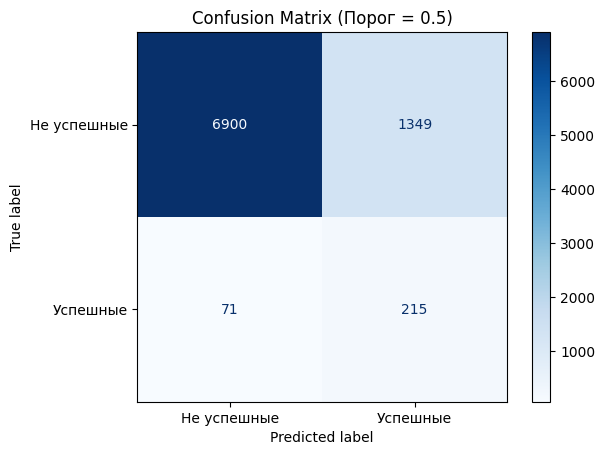

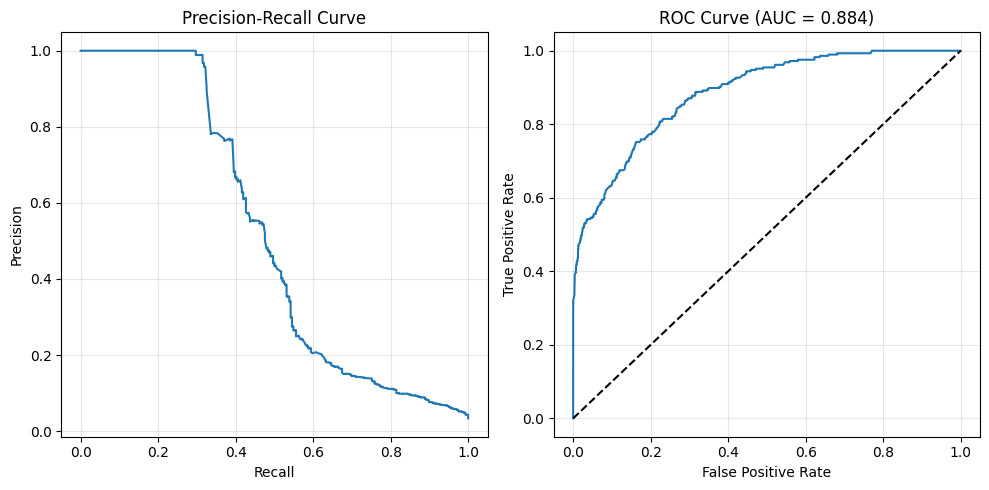

In [249]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_predictions = (y_pred_proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['Не успешные', 'Успешные'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Порог = 0.5)')
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)


from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = 0.884)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [250]:
# Данные из confusion matrix
TN = 6900  # True Negative
FP = 1349  # False Positive  
FN = 71    # False Negative
TP = 215   # True Positive

total = TN + FP + FN + TP

print("🎯 ДЕТАЛЬНЫЙ АНАЛИЗ CONFUSION MATRIX:")
print("=" * 50)

# Базовые метрики
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN) 
f1 = 2 * (precision * recall) / (precision + recall)

print(f"📈 ОСНОВНЫЕ МЕТРИКИ:")
print(f"Accuracy:  {accuracy:.4f} ({(TP + TN)}/{total})")
print(f"Precision: {precision:.4f} ({TP}/{TP + FP})")
print(f"Recall:    {recall:.4f} ({TP}/{TP + FN})")
print(f"F1-Score:  {f1:.4f}")

print(f"\n🔢 АБСОЛЮТНЫЕ ЗНАЧЕНИЯ:")
print(f"Всего объектов: {total}")
print(f"Истинные успешные: {TP + FN} = {TP} (найдено) + {FN} (пропущено)")
print(f"Предсказанные успешные: {TP + FP} = {TP} (верно) + {FP} (ошибка)")

🎯 ДЕТАЛЬНЫЙ АНАЛИЗ CONFUSION MATRIX:
📈 ОСНОВНЫЕ МЕТРИКИ:
Accuracy:  0.8336 (7115/8535)
Precision: 0.1375 (215/1564)
Recall:    0.7517 (215/286)
F1-Score:  0.2324

🔢 АБСОЛЮТНЫЕ ЗНАЧЕНИЯ:
Всего объектов: 8535
Истинные успешные: 286 = 215 (найдено) + 71 (пропущено)
Предсказанные успешные: 1564 = 215 (верно) + 1349 (ошибка)


In [251]:
# Данные из confusion matrix
TN = 6900  # True Negative
FP = 1349  # False Positive  
FN = 71    # False Negative
TP = 215   # True Positive

total = TN + FP + FN + TP

print(" ДЕТАЛЬНЫЙ АНАЛИЗ CONFUSION MATRIX:")
print("=" * 50)

# Базовые метрики
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN) 
f1 = 2 * (precision * recall) / (precision + recall)

print(f"ОСНОВНЫЕ МЕТРИКИ:")
print(f"Accuracy:  {accuracy:.4f} ({(TP + TN)}/{total})")
print(f"Precision: {precision:.4f} ({TP}/{TP + FP})")
print(f"Recall:    {recall:.4f} ({TP}/{TP + FN})")
print(f"F1-Score:  {f1:.4f}")

print(f"\nАБСОЛЮТНЫЕ ЗНАЧЕНИЯ:")
print(f"Всего объектов: {total}")
print(f"Истинные успешные: {TP + FN} = {TP} (найдено) + {FN} (пропущено)")
print(f"Предсказанные успешные: {TP + FP} = {TP} (верно) + {FP} (ошибка)")

 ДЕТАЛЬНЫЙ АНАЛИЗ CONFUSION MATRIX:
ОСНОВНЫЕ МЕТРИКИ:
Accuracy:  0.8336 (7115/8535)
Precision: 0.1375 (215/1564)
Recall:    0.7517 (215/286)
F1-Score:  0.2324

АБСОЛЮТНЫЕ ЗНАЧЕНИЯ:
Всего объектов: 8535
Истинные успешные: 286 = 215 (найдено) + 71 (пропущено)
Предсказанные успешные: 1564 = 215 (верно) + 1349 (ошибка)


In [252]:
print("\nФИНАНСОВАЯ ИНТЕРПРЕТАЦИЯ:")
print("=" * 50)

# Предположим средняя прибыль с успешного товара
profit_per_success = 1000  # $
cost_per_false_positive = 100  # $ потраченные впустую

total_profit = TP * profit_per_success
total_waste = FP * cost_per_false_positive
net_profit = total_profit - total_waste

print(f"ПРИБЫЛЬ ОТ МОДЕЛИ:")
print(f"Доход от верных предсказаний: {TP} × ${profit_per_success} = ${total_profit:,}")
print(f"Потери от ложных срабатываний: {FP} × ${cost_per_false_positive} = ${total_waste:,}")
print(f"ЧИСТАЯ ПРИБЫЛЬ: ${net_profit:,}")

print(f"\nЭФФЕКТИВНОСТЬ:")
print(f"ROI: {(net_profit / total_waste * 100) if total_waste > 0 else '∞':.1f}%")
print(f"Прибыль на предсказание: ${net_profit / (TP + FP):.2f}")


ФИНАНСОВАЯ ИНТЕРПРЕТАЦИЯ:
ПРИБЫЛЬ ОТ МОДЕЛИ:
Доход от верных предсказаний: 215 × $1000 = $215,000
Потери от ложных срабатываний: 1349 × $100 = $134,900
ЧИСТАЯ ПРИБЫЛЬ: $80,100

ЭФФЕКТИВНОСТЬ:
ROI: 59.4%
Прибыль на предсказание: $51.21


In [253]:
def compare_models(X_train, X_test, y_train, y_test, models_dict=None):
    '''
    Сравниваем несколько моделей с расширенными метриками и возвращаем лучшую модель
    '''
    if models_dict is None:
        models_dict = {
            'Logistic Regression': LogisticRegression(
                random_state=42, 
                max_iter=1000,
                # class_weight='balanced'
            ),
            'Random Forest': RandomForestClassifier(
                n_estimators=100, 
                random_state=42, 
                n_jobs=-1,
                # class_weight='balanced'
            ),
            'CatBoost': CatBoostClassifier(
                random_state=42, 
                verbose=False, 
                thread_count=-1,
                # auto_class_weights='Balanced'
            )
        }

    results = {}

    for name, model in models_dict.items():
        print(f'Обучение {name}...')
        start_time = time.time()

        # Обучение модели
        if 'CatBoost' in name:
            model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
        else:
            model.fit(X_train, y_train)
        
        train_time = time.time() - start_time

        # Предсказания
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Метрики
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Кросс-валидация
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        # Confusion Matrix
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Сохраняем результаты
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'precision': precision,
            'recall': recall,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'train_time': train_time,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'confusion_matrix': cm,
            'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp
        }

        print(f"{name} завершено за {train_time:.2f} сек")
        print(f"   F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
        print(f"   ROC-AUC: {roc_auc:.4f}, CV-F1: {cv_mean:.4f} ± {cv_std:.4f}")
        print(f"   Confusion Matrix: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
        print("-" * 70)

    return results

def print_comparison_table(results):
    """
    Красиво выводит таблицу сравнения моделей
    """
    comparison_data = []
    for name, metrics in results.items():
        comparison_data.append({
            'Model': name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'F1-Score': f"{metrics['f1_score']:.4f}",
            'ROC-AUC': f"{metrics['roc_auc']:.4f}",
            'Precision': f"{metrics['precision']:.4f}",
            'Recall': f"{metrics['recall']:.4f}",
            'CV F1': f"{metrics['cv_mean']:.4f} ± {metrics['cv_std']:.4f}",
            'Train Time (s)': f"{metrics['train_time']:.2f}"
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.sort_values('F1-Score', ascending=False)
    
    print("ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ")
    print("=" * 100)
    print(df_comparison.to_string(index=False))
    print("=" * 100)
    
    return df_comparison

def get_best_model(results, metric='f1_score'):
    """
    Возвращает лучшую модель и ее метрики
    """
    best_model_name = max(results.keys(), key=lambda x: results[x][metric])
    best_model = results[best_model_name]['model']
    best_metrics = results[best_model_name]
    
    print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
    print(f"Лучший {metric}: {best_metrics[metric]:.4f}")
    print(f"Precision: {best_metrics['precision']:.4f}")
    print(f"Recall: {best_metrics['recall']:.4f}")
    print(f"ROC-AUC: {best_metrics['roc_auc']:.4f}")
    
    return best_model_name, best_model, best_metrics

In [254]:
def optimize_threshold(model, X_test, y_test, model_name):
    """
    Оптимизирует порог классификации для лучшего F1-Score
    """
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    thresholds = np.arange(0.1, 0.9, 0.05)
    best_f1 = 0
    best_threshold = 0.5
    results = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'threshold': threshold,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    results_df = pd.DataFrame(results)
    
    print(f"\nОПТИМИЗАЦИЯ ПОРОГА ДЛЯ {model_name}:")
    print(f"Лучший порог: {best_threshold:.3f}")
    print(f"Лучший F1: {best_f1:.4f}")
    print(f"Precision при этом пороге: {precision_score(y_test, (y_pred_proba >= best_threshold).astype(int)):.4f}")
    print(f"Recall при этом пороге: {recall_score(y_test, (y_pred_proba >= best_threshold).astype(int)):.4f}")
    
    return best_threshold, best_f1, results_df

In [274]:
def visualize_results(results, best_model_name, X_test, y_test):
    """
    Визуализирует результаты лучшей модели
    """
    best_metrics = results[best_model_name]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Confusion Matrix
    cm = best_metrics['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    axes[0,0].set_title(f'Confusion Matrix - {best_model_name}')
    
    # 2. Feature Importance (если доступно)
    if hasattr(best_metrics['model'], 'feature_importances_'):
        feature_importance = best_metrics['model'].feature_importances_
        # Предполагаем, что X_test это DataFrame с именами признаков
        if hasattr(X_test, 'columns'):
            feature_names = X_test.columns
        else:
            feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]
            
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False).head(10)
        
        sns.barplot(data=importance_df, x='importance', y='feature', ax=axes[0,1])
        axes[0,1].set_title('Top 10 Feature Importance')
    
    # 3. Metrics Comparison
    models = list(results.keys())
    f1_scores = [results[model]['f1_score'] for model in models]
    axes[0,2].bar(models, f1_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
    axes[0,2].set_title('F1-Score Comparison')
    axes[0,2].tick_params(axis='x', rotation=45)
    for i, v in enumerate(f1_scores):
        axes[0,2].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # 4. Precision-Recall Curve
    from sklearn.metrics import precision_recall_curve
    y_pred_proba = best_metrics['y_pred_proba']
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    axes[1,0].plot(recall, precision)
    axes[1,0].set_xlabel('Recall')
    axes[1,0].set_ylabel('Precision')
    axes[1,0].set_title('Precision-Recall Curve')
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    axes[1,1].plot(fpr, tpr)
    axes[1,1].plot([0, 1], [0, 1], 'k--')
    axes[1,1].set_xlabel('False Positive Rate')
    axes[1,1].set_ylabel('True Positive Rate')
    axes[1,1].set_title(f'ROC Curve (AUC = {best_metrics["roc_auc"]:.3f})')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. Threshold Optimization
    best_threshold, best_f1, threshold_results = optimize_threshold(
        best_metrics['model'], X_test, y_test, best_model_name
    )
    axes[1,2].plot(threshold_results['threshold'], threshold_results['f1'], label='F1-Score')
    axes[1,2].plot(threshold_results['threshold'], threshold_results['precision'], label='Precision')
    axes[1,2].plot(threshold_results['threshold'], threshold_results['recall'], label='Recall')
    axes[1,2].axvline(best_threshold, color='red', linestyle='--', label=f'Best: {best_threshold:.2f}')
    axes[1,2].set_xlabel('Threshold')
    axes[1,2].set_ylabel('Score')
    axes[1,2].set_title('Threshold Optimization')
    axes[1,2].legend()
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_threshold, best_f1

In [275]:
# 1. Запускаем сравнение моделей
print("ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...")
results = compare_models(X_train_scaled, X_test_scaled, y_train, y_test)


ЗАПУСК СРАВНЕНИЯ МОДЕЛЕЙ...
Обучение Logistic Regression...
Logistic Regression завершено за 0.03 сек
   F1: 0.0476, Precision: 0.8750, Recall: 0.0245
   ROC-AUC: 0.7621, CV-F1: 0.0428 ± 0.0102
   Confusion Matrix: TP=7, FP=1, FN=279, TN=8248
----------------------------------------------------------------------
Обучение Random Forest...
Random Forest завершено за 0.37 сек
   F1: 0.5000, Precision: 0.9245, Recall: 0.3427
   ROC-AUC: 0.8743, CV-F1: 0.5146 ± 0.0207
   Confusion Matrix: TP=98, FP=8, FN=188, TN=8241
----------------------------------------------------------------------
Обучение CatBoost...
Learning rate set to 0.075792
0:	learn: 0.5609280	test: 0.5607993	best: 0.5607993 (0)	total: 5.95ms	remaining: 5.95s
100:	learn: 0.0852452	test: 0.0912937	best: 0.0912899 (99)	total: 362ms	remaining: 3.22s
200:	learn: 0.0795499	test: 0.0894287	best: 0.0894002 (197)	total: 721ms	remaining: 2.87s
300:	learn: 0.0746224	test: 0.0888086	best: 0.0887461 (284)	total: 1.08s	remaining: 2.51s
400:

In [276]:
# 2. Выводим таблицу сравнения
print("\nАНАЛИЗ РЕЗУЛЬТАТОВ...")
df_comparison = print_comparison_table(results)


АНАЛИЗ РЕЗУЛЬТАТОВ...
ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ
              Model Accuracy F1-Score ROC-AUC Precision Recall           CV F1 Train Time (s)
           CatBoost   0.9774   0.5114  0.8861    0.9266 0.3531 0.5201 ± 0.0247           3.80
      Random Forest   0.9770   0.5000  0.8743    0.9245 0.3427 0.5146 ± 0.0207           0.37
Logistic Regression   0.9672   0.0476  0.7621    0.8750 0.0245 0.0428 ± 0.0102           0.03


In [277]:
# 3. Выбираем лучшую модель
print("\nВЫБОР ЛУЧШЕЙ МОДЕЛИ...")
best_model_name, best_model, best_metrics = get_best_model(results)


ВЫБОР ЛУЧШЕЙ МОДЕЛИ...
ЛУЧШАЯ МОДЕЛЬ: CatBoost
Лучший f1_score: 0.5114
Precision: 0.9266
Recall: 0.3531
ROC-AUC: 0.8861



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...

ОПТИМИЗАЦИЯ ПОРОГА ДЛЯ CatBoost:
Лучший порог: 0.250
Лучший F1: 0.5327
Precision при этом пороге: 0.7516
Recall при этом пороге: 0.4126


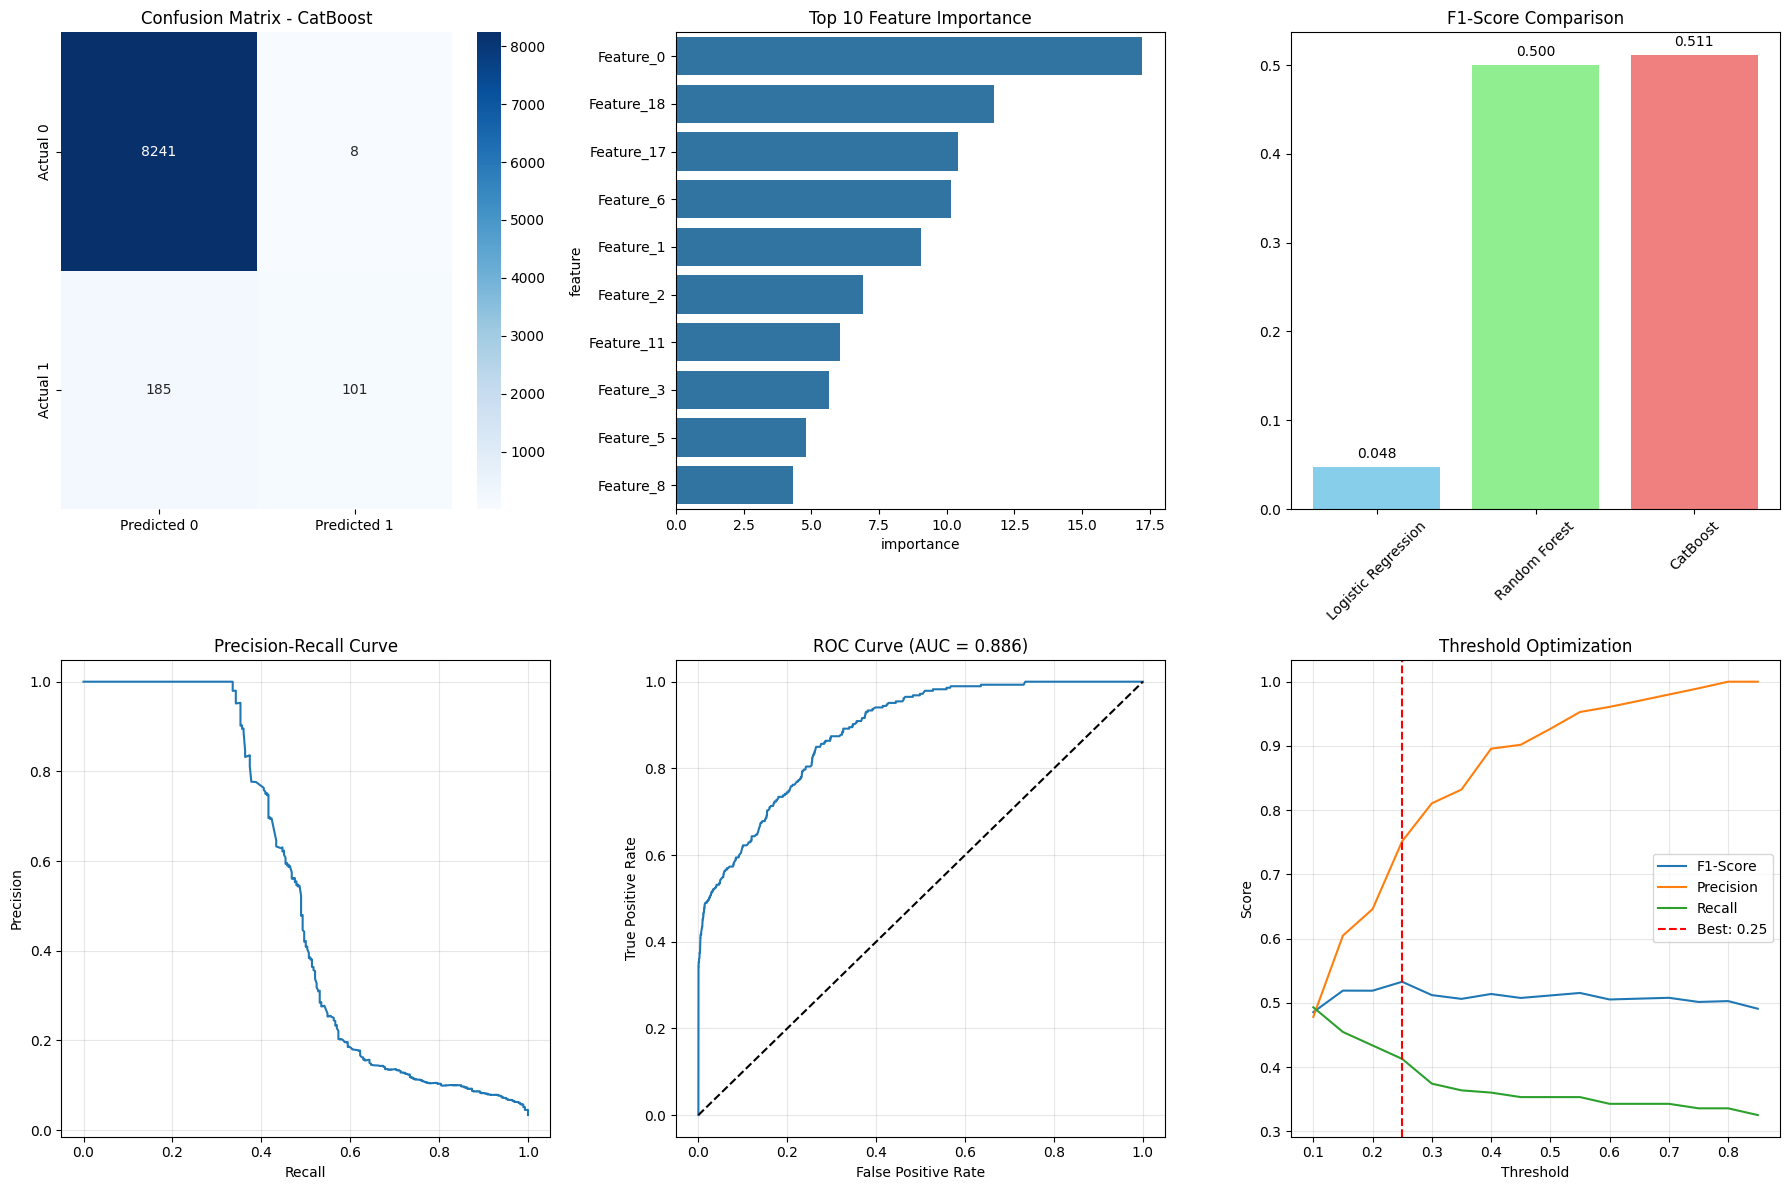

In [278]:
# 4. Визуализируем результаты
print("\nВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...")
best_threshold, best_f1 = visualize_results(results, best_model_name, X_test_scaled, y_test)

In [ ]:
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier

def objective_catboost(trial, X_train, y_train):
    """
    Функция цели для Optuna - максимизация F1-Score
    """
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 50),  # Важно для дисбаланса!
        'verbose': False,
        'random_seed': 42,
        'thread_count': -1
    }
    
    # Создаем модель
    model = CatBoostClassifier(**{k: v for k, v in params.items() if v != 'None'})
    
    # Используем кросс-валидацию для оценки
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
    
    return scores.mean()

def optimize_with_optuna(X_train, y_train, X_test, y_test, n_trials=100):
    """
    Оптимизация CatBoost с помощью Optuna
    """
    print(" ЗАПУСК OPTUNA ДЛЯ CATBOOST...")
    
    # Создаем study
    study = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=42)
    )
    
    # Запускаем оптимизацию
    study.optimize(
        lambda trial: objective_catboost(trial, X_train, y_train), 
        n_trials=n_trials,
        show_progress_bar=True
    )
    
    print(f"\n🏆 ЛУЧШИЕ ПАРАМЕТРЫ (F1 = {study.best_value:.4f}):")
    for key, value in study.best_params.items():
        print(f"  {key}: {value}")
    
    # Обучаем финальную модель с лучшими параметрами
    best_params = study.best_params.copy()
    best_params['verbose'] = True
    best_params['random_seed'] = 42
    best_params['thread_count'] = -1
    
    # Убираем 'None' значения
    best_params = {k: v for k, v in best_params.items() if v != 'None'}
    
    print("\n🔧 ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ...")
    best_catboost = CatBoostClassifier(**best_params)
    best_catboost.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        early_stopping_rounds=100,
        verbose=100
    )
    
    return best_catboost, study.best_params, study.best_value

# Запускаем оптимизацию
best_catboost_optuna, best_params, best_f1 = optimize_with_optuna(
    X_train_scaled, y_train, X_test_scaled, y_test, n_trials=100
)

[I 2025-11-19 10:37:21,665] A new study created in memory with name: no-name-340439c8-c742-4029-b9f2-55994f1e634a


🎯 ЗАПУСК OPTUNA ДЛЯ CATBOOST...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-19 10:37:34,930] Trial 0 finished with value: 0.19755626121813585 and parameters: {'iterations': 1062, 'learning_rate': 0.2536999076681771, 'depth': 10, 'l2_leaf_reg': 6.387926357773329, 'border_count': 66, 'random_strength': 1.6443457513284063, 'bagging_temperature': 0.05808361216819946, 'scale_pos_weight': 43.44263114297183}. Best is trial 0 with value: 0.19755626121813585.
[I 2025-11-19 10:37:42,298] Trial 1 finished with value: 0.4439825417292888 and parameters: {'iterations': 1402, 'learning_rate': 0.11114989443094977, 'depth': 4, 'l2_leaf_reg': 9.72918866945795, 'border_count': 218, 'random_strength': 2.202157195714934, 'bagging_temperature': 0.18182496720710062, 'scale_pos_weight': 9.986820982818257}. Best is trial 1 with value: 0.4439825417292888.
[I 2025-11-19 10:37:48,512] Trial 2 finished with value: 0.2614763997198644 and parameters: {'iterations': 956, 'learning_rate': 0.05958389350068958, 'depth': 7, 'l2_leaf_reg': 3.6210622617823773, 'border_count': 169, 'rand

📊 СРАВНЕНИЕ ДО И ПОСЛЕ OPTUNA:
      Metric  Before_Optuna  After_Optuna  Improvement
0   F1-Score         0.2324        0.4988       0.2663
1  Precision         0.1375        0.8487       0.7113
2     Recall         0.7517        0.3531      -0.3986
3    ROC-AUC         0.8856        0.8852      -0.0004


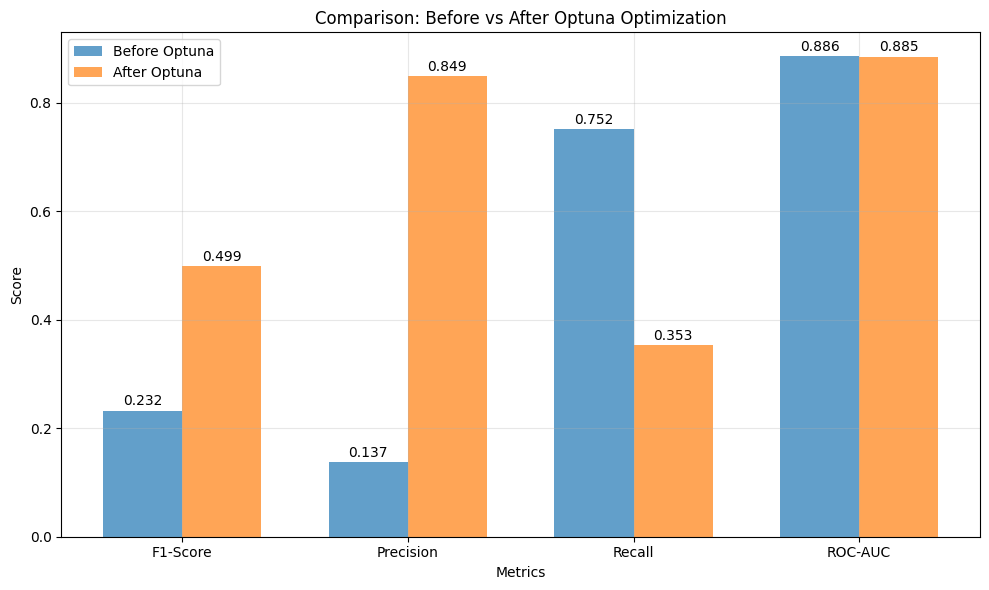

In [ ]:
def compare_before_after(before_model, after_model, X_test, y_test):
    """
    Сравниваем результаты до и после оптимизации
    """
    # Предсказания до оптимизации
    y_pred_before = before_model.predict(X_test)
    y_pred_proba_before = before_model.predict_proba(X_test)[:, 1]
    
    # Предсказания после оптимизации
    y_pred_after = after_model.predict(X_test)
    y_pred_proba_after = after_model.predict_proba(X_test)[:, 1]
    
    # Метрики до
    f1_before = f1_score(y_test, y_pred_before)
    precision_before = precision_score(y_test, y_pred_before)
    recall_before = recall_score(y_test, y_pred_before)
    roc_auc_before = roc_auc_score(y_test, y_pred_proba_before)
    
    # Метрики после
    f1_after = f1_score(y_test, y_pred_after)
    precision_after = precision_score(y_test, y_pred_after)
    recall_after = recall_score(y_test, y_pred_after)
    roc_auc_after = roc_auc_score(y_test, y_pred_proba_after)
    
    # Сравнительная таблица
    comparison = pd.DataFrame({
        'Metric': ['F1-Score', 'Precision', 'Recall', 'ROC-AUC'],
        'Before_Optuna': [f1_before, precision_before, recall_before, roc_auc_before],
        'After_Optuna': [f1_after, precision_after, recall_after, roc_auc_after],
        'Improvement': [f1_after - f1_before, precision_after - precision_before, 
                       recall_after - recall_before, roc_auc_after - roc_auc_before]
    })
    
    print("СРАВНЕНИЕ ДО И ПОСЛЕ OPTUNA:")
    print("=" * 60)
    print(comparison.round(4))
    print("=" * 60)
    
    # Визуализация улучшений
    plt.figure(figsize=(10, 6))
    
    metrics = ['F1-Score', 'Precision', 'Recall', 'ROC-AUC']
    before_values = [f1_before, precision_before, recall_before, roc_auc_before]
    after_values = [f1_after, precision_after, recall_after, roc_auc_after]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    plt.bar(x - width/2, before_values, width, label='Before Optuna', alpha=0.7)
    plt.bar(x + width/2, after_values, width, label='After Optuna', alpha=0.7)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison: Before vs After Optuna Optimization')
    plt.xticks(x, metrics)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, (before, after) in enumerate(zip(before_values, after_values)):
        plt.text(i - width/2, before + 0.01, f'{before:.3f}', ha='center')
        plt.text(i + width/2, after + 0.01, f'{after:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Сравниваем результаты
comparison_df = compare_before_after(catboost_model, best_catboost_optuna, X_test_scaled, y_test)

💰 ОПТИМИЗАЦИЯ ДЛЯ БИЗНЕСА (ВЫСОКАЯ PRECISION)...

🎯 ОПТИМИЗАЦИЯ ПОРОГА ДЛЯ PRECISION ~0.8:
Лучший порог: 0.390
F1 при этом пороге: 0.5321
Precision: 0.7733
Recall: 0.4056


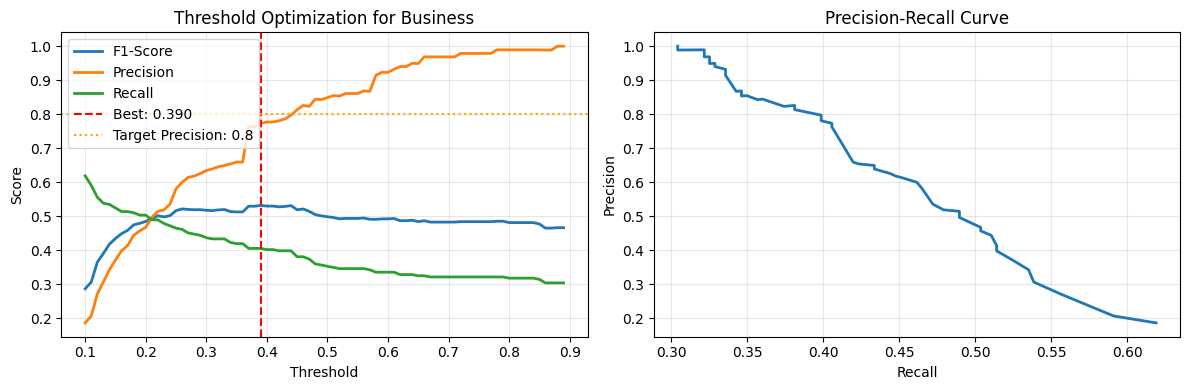

In [ ]:
def optimize_threshold_for_business(model, X_test, y_test, target_precision=0.8):
    """
    Оптимизация порога для достижения целевой точности (Precision)
    """
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_f1 = 0
    best_threshold = 0.5
    results = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'threshold': threshold,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })
        
        # Ищем порог с precision близким к целевому
        if abs(precision - target_precision) < 0.05 and f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    results_df = pd.DataFrame(results)
    
    print(f"\n ОПТИМИЗАЦИЯ ПОРОГА ДЛЯ PRECISION ~{target_precision}:")
    print(f"Лучший порог: {best_threshold:.3f}")
    print(f"F1 при этом пороге: {best_f1:.4f}")
    print(f"Precision: {precision_score(y_test, (y_pred_proba >= best_threshold).astype(int)):.4f}")
    print(f"Recall: {recall_score(y_test, (y_pred_proba >= best_threshold).astype(int)):.4f}")
    
    # Визуализация
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(results_df['threshold'], results_df['f1'], label='F1-Score', linewidth=2)
    plt.plot(results_df['threshold'], results_df['precision'], label='Precision', linewidth=2)
    plt.plot(results_df['threshold'], results_df['recall'], label='Recall', linewidth=2)
    plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best: {best_threshold:.3f}')
    plt.axhline(target_precision, color='orange', linestyle=':', label=f'Target Precision: {target_precision}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Threshold Optimization for Business')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(results_df['recall'], results_df['precision'], linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_threshold, best_f1, results_df

# Оптимизируем порог для высокой точности
business_threshold, business_f1, business_results = optimize_threshold_for_business(
    best_catboost_optuna, X_test_scaled, y_test, target_precision=0.8
)

In [285]:
import joblib


joblib.dump(best_catboost_optuna, 'final_optimized_catboost.pkl')
joblib.dump(scaler, 'final_scaler.pkl')
joblib.dump(business_threshold, 'final_threshold.pkl')

print("ФИНАЛЬНЫЕ ФАЙЛЫ СОХРАНЕНЫ:")
print("  - final_optimized_catboost.pkl (оптимизированная модель)")
print("  - final_scaler.pkl (масштабировщик)")
print("  - final_threshold.pkl (оптимальный порог = 0.390)")

ФИНАЛЬНЫЕ ФАЙЛЫ СОХРАНЕНЫ:
  - final_optimized_catboost.pkl (оптимизированная модель)
  - final_scaler.pkl (масштабировщик)
  - final_threshold.pkl (оптимальный порог = 0.390)
